In [141]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore')
from matplotlib import pyplot as plt

## Lecture 5 ##

## Bar Charts - Review

In [142]:
top = Table.read_table('top_movies_2017.csv')
studios = top.select('Studio')
studio_counts = studios.group('Studio')
studio_counts

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [143]:
sum(studio_counts.column(1))

200

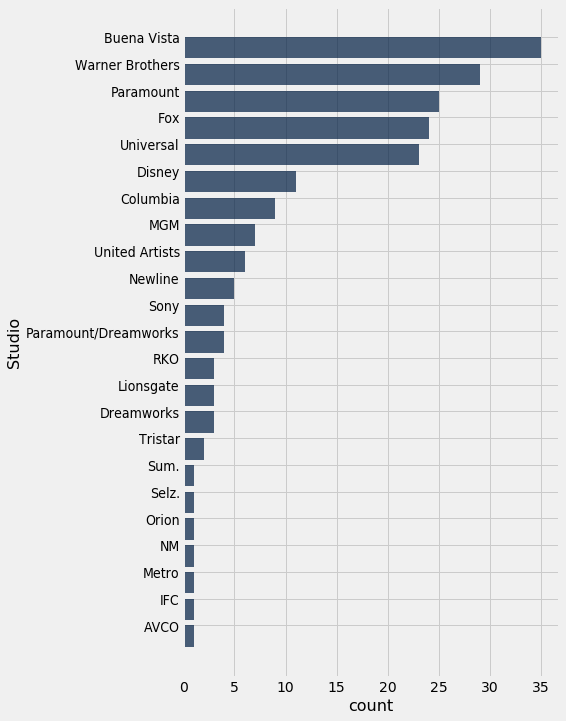

In [144]:
studio_counts.sort(1, descending=True).barh(0)

## Numerical Distribution ##

In [145]:
ages = 2018 - top.column('Year')
top = top.with_column('Age', ages)

In [146]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,79
Star Wars,Fox,460998007,1583483200,1977,41
The Sound of Music,Fox,158671368,1266072700,1965,53
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,36
Titanic,Paramount,658672302,1204368000,1997,21
The Ten Commandments,Paramount,65500000,1164590000,1956,62
Jaws,Universal,260000000,1138620700,1975,43
Doctor Zhivago,MGM,111721910,1103564200,1965,53
The Exorcist,Warner Brothers,232906145,983226600,1973,45
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,81


## Binning ##

In [147]:
min(ages), max(ages)

(1, 97)

In [148]:
my_uniform_bins = make_array(0, 25, 50, 75, 100)

In [149]:
top.bin('Age', bins = my_uniform_bins)

bin,Age count
0,93
25,66
50,34
75,7
100,0


In [150]:
top.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,93
25,66
50,34
75,7
100,0


In [151]:
sum(top.bin('Age', bins = my_uniform_bins).column(1))

200

In [152]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [153]:
top.bin('Age', bins = my_bins)

bin,Age count
0,21
5,17
10,18
15,37
25,40
40,52
65,15
100,0


In [154]:
sum(top.bin('Age', bins = my_bins).column(1))

200

## Histograms ##

In [155]:
my_uniform_bins
top.bin('Age', bins = my_uniform_bins)

bin,Age count
0,93
25,66
50,34
75,7
100,0


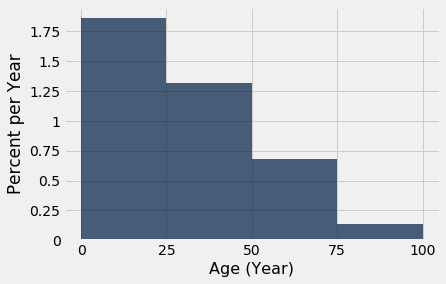

In [156]:
top.hist('Age', bins = my_uniform_bins, unit = 'Year')
plt.xticks(my_uniform_bins);

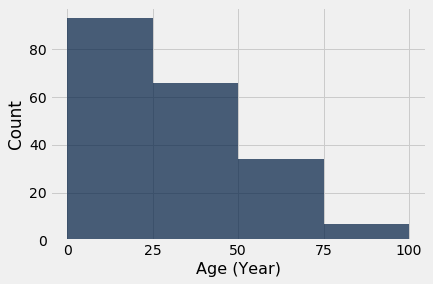

In [157]:
top.hist('Age', bins = my_uniform_bins, unit = 'Year', normed = False)
plt.xticks(my_uniform_bins);

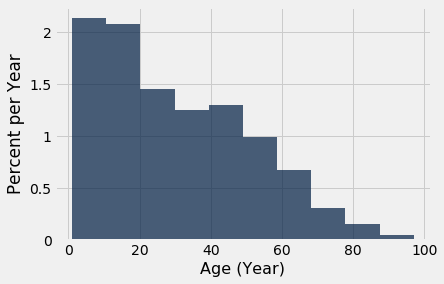

In [158]:
top.hist('Age', unit='Year')

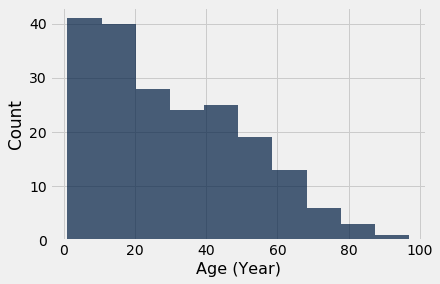

In [159]:
top.hist('Age', unit='Year',normed=False)

In [160]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [161]:
top.bin('Age', bins = my_bins)

bin,Age count
0,21
5,17
10,18
15,37
25,40
40,52
65,15
100,0


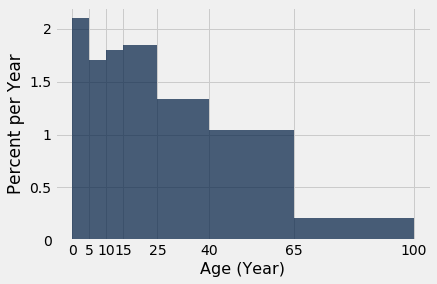

In [162]:
top.hist('Age', bins = my_bins, unit = 'Year')
plt.xticks(my_bins);

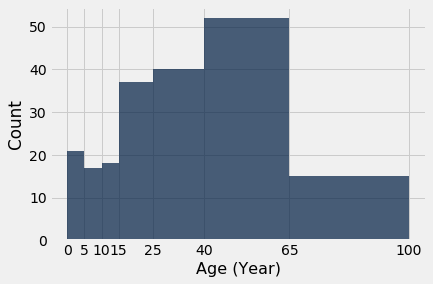

In [163]:
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)
plt.xticks(my_bins);

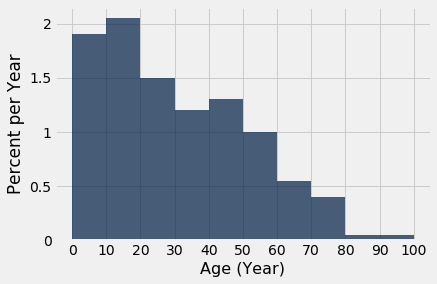

In [164]:
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')
plt.xticks(np.arange(0, 110, 10));

In [166]:
top.bin('Age', bins = my_bins)

bin,Age count
0,21
5,17
10,18
15,37
25,40
40,52
65,15
100,0


In [ ]:
# 52 out of 200 movies in the [40, 65) bin

percent = (52/200) * 100
percent

In [ ]:
width = 65 - 40
width

In [ ]:
height = percent / width
height

## Overlaying Histograms

In [ ]:
galton = Table.read_table('galton.csv')

In [ ]:
galton

In [ ]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [ ]:
heights

In [ ]:
heights.hist(1, bins=np.arange(55, 80, 2), unit='inch')

In [ ]:
heights.where(1, are.between(65, 67)).num_rows / heights.num_rows

In [ ]:
heights.hist(0, bins=np.arange(55, 80, 2), unit='inch')

In [ ]:
heights.hist(bins=np.arange(55, 80, 2), unit='inch')